In [1]:
from typing import Optional, List, Iterable, Tuple, Dict
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm

import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

In [2]:
from brownian_datagen import (BrownianDatagen,
                              create_dataholder_for_windows_and_targets,
                              create_simple_flip_dataholder_for_windows_and_targets)
from bayesian import plot_predictions, quality_metrics
from bayesian_varinf import (ExpResultsWithLosses,
                             ExpResultsWithTwoLosses,
                             posterior_predictive_forward_and_backward,
                             train_fb_n_times,
                             load_learning_curves)

(<Figure size 500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Forward trajectories'}, xlabel='index', ylabel='coordinate of the particle, forward'>,
        <Axes: title={'center': 'Backward trajectories'}, xlabel='index', ylabel='coordinate of the particle, backward'>,
        <Axes: title={'center': 'Work distributions'}>], dtype=object))

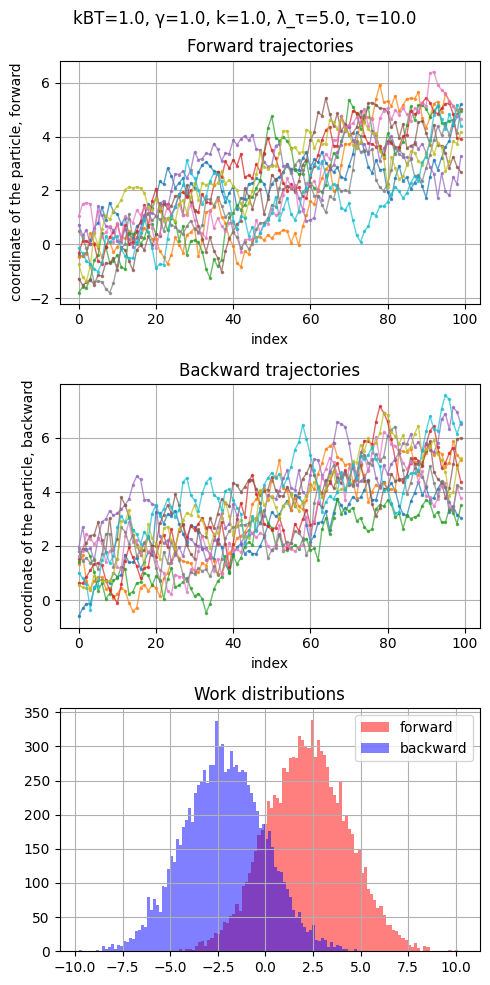

In [3]:
brownian = BrownianDatagen(kBT=1., γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_for_windows_and_targets(brownian, numParticles=50, rng_seed=42)
brownian.visualize()

In [4]:
save_dir_prefix = "20230724_preds/brownian_varinf_rmse/test1/"
num_runs = 1
train_fb_n_times(dt, num_runs=num_runs, num_epochs=5000, save_dir_prefix=save_dir_prefix)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1870.79it/s]


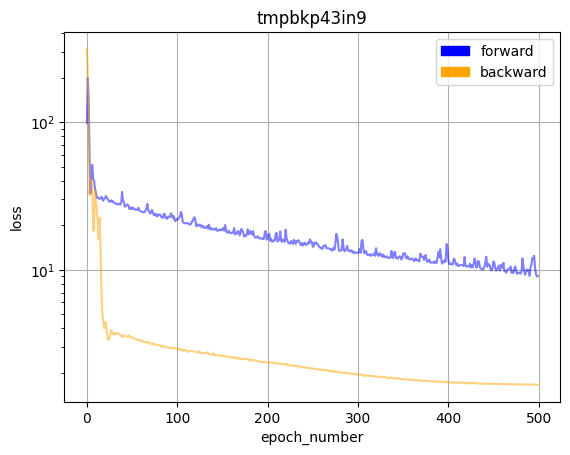

In [5]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, rmse_instead=True)
l.plot_learning_curves()

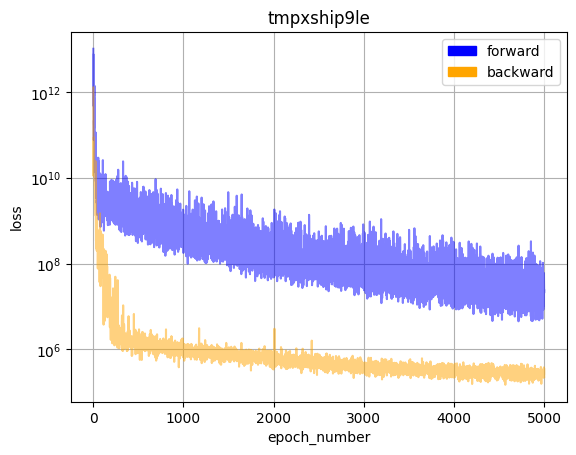

In [6]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs, rmse_instead=False)
l.plot_learning_curves()

In [8]:
er = ExpResultsWithTwoLosses("20230724_preds/brownian_varinf_rmse/test1/run=00000/")
print("forward", quality_metrics(er.pred_obs_f, er.targets_f))
print("backward", quality_metrics(er.pred_obs_b, er.targets_b))

forward {'mae': 6.5988616943359375, 'rmse': 9.018254311541492, 'crps': 6.281367778778076, 'mean_std': 15.92513656616211, 'mse_from_all': 411.9236755371094}
backward {'mae': 1.380860686302185, 'rmse': 1.6682240203704997, 'crps': 1.2810291051864624, 'mean_std': 0.4248964488506317, 'mse_from_all': 3.947484016418457}
